In [42]:
# autoreload magic
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np


from utils.analysis_utils import *

from views.view_runs import get_verdict_configs



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Analyze QA accuracy

In [3]:
filters = {
    # MODEL OPTIONS
    # 'config_model_name': "x-ai/grok-4-fast",
    'config_model_name': "openai/gpt-4o-mini",
    # 'config_model_name': "qwen/qwen-2.5-7b-instruct",
    # 'config_model_name': "meta-llama/llama-3-8b-instruct",

    # DATASET OPTIONS
    'config_dataset_name': "Idavidrein/gpqa",
    'config_dataset_subset': "gpqa_diamond",
    'config_dataset_split': "train",

    # 'config_dataset_name': "TIGER-Lab/MMLU-Pro",
    # 'config_dataset_subset': None,
    # 'config_dataset_split': "test",

    # OTHER OPTIONS
    'config_random_seed': 42,
    'config_num_choices': 2,
}


In [4]:
df = load_qa(filters)

accuracy = df['is_correct'].mean()
correct_count = df['is_correct'].sum()
total_count = len(df)

print(f"Accuracy: {accuracy:.2%}")
print(f"Correct: {correct_count}/{total_count}")

Accuracy: 56.85%
Correct: 112/197


### Analyze verdict accuracy

In [5]:
run_id = 'hdudzt0'

df = load_verdict(run_id)

accuracy = df['is_correct_verdict'].mean()
correct_count = df['is_correct_verdict'].sum()
total_count = len(df)

print(f"Accuracy: {accuracy:.2%}")
print(f"Correct: {correct_count}/{total_count}")

Accuracy: 64.80%
Correct: 127/196


### Compared Verdict to QA accuracy

In [6]:
# verdict_run_id = 'uh2gayc'
verdict_run_id = 'k26y5y6'

merged_df = load_debate_and_verdict_and_qa(verdict_run_id)

judge_qa = merged_df["is_correct_judge_qa"].mean().round(2) 
debater_qa = merged_df["is_correct_debater_qa"].mean().round(2)
debate_verdict = merged_df["is_correct_verdict"].mean().round(2)

print()
print(f'Judge QA: {judge_qa} ({merged_df["is_correct_judge_qa"].sum()}/{merged_df["is_correct_judge_qa"].count()})')
print(f'Debater QA: {debater_qa} ({merged_df["is_correct_debater_qa"].sum()}/{merged_df["is_correct_debater_qa"].count()})')
print(f'Debate Verdict: {debate_verdict} ({merged_df["is_correct_verdict"].sum()}/{merged_df["is_correct_verdict"].count()})')

starting records: 193
dropped 1 without judge QA
dropped 2 without debater QA
final records: 190

Judge QA: 0.57 (108/190)
Debater QA: 0.92 (175/190)
Debate Verdict: 0.74 (141/190)


In [7]:
# Display columns that start with 'config'
pd.set_option('display.max_columns', None)
config_columns = [col for col in merged_df.columns if col.startswith('config')]
merged_df[config_columns].head()

,config,config_debate_dataset_name,config_debate_dataset_subset,config_debate_dataset_split,config_debate_debater_model,config_debate_debater_temperature,config_debate_max_output_tokens,config_debate_debater_reasoning_effort,config_debate_debater_reasoning_max_tokens,config_debate_num_questions,config_debate_random_seed,config_debate_num_choices,config_debate_num_turns,config_debate_private_scratchpad,config_debate_public_argument_word_limit,config_debate_private_reasoning_word_limit,config_debate_max_threads,config_verdict_debate_run_id,config_verdict_judge_model,config_verdict_judge_temperature,config_verdict_max_output_tokens,config_verdict_judge_reasoning_effort,config_verdict_judge_reasoning_max_tokens,config_model_name_x,config_model_name_y
0,"{'dataset_name': 'Idavidrein/gpqa', 'dataset_s...",Idavidrein/gpqa,gpqa_diamond,train,x-ai/grok-4-fast,0.0,None,None,None,198,42,2,1,False,200,NaN,5000,17zguxe,openai/gpt-4o-mini,0.0,5000,None,None,openai/gpt-4o-mini,x-ai/grok-4-fast
1,"{'dataset_name': 'Idavidrein/gpqa', 'dataset_s...",Idavidrein/gpqa,gpqa_diamond,train,x-ai/grok-4-fast,0.0,None,None,None,198,42,2,1,False,200,NaN,5000,17zguxe,openai/gpt-4o-mini,0.0,5000,None,None,openai/gpt-4o-mini,x-ai/grok-4-fast
2,"{'dataset_name': 'Idavidrein/gpqa', 'dataset_s...",Idavidrein/gpqa,gpqa_diamond,train,x-ai/grok-4-fast,0.0,None,None,None,198,42,2,1,False,200,NaN,5000,17zguxe,openai/gpt-4o-mini,0.0,5000,None,None,openai/gpt-4o-mini,x-ai/grok-4-fast
3,"{'dataset_name': 'Idavidrein/gpqa', 'dataset_s...",Idavidrein/gpqa,gpqa_diamond,train,x-ai/grok-4-fast,0.0,None,None,None,198,42,2,1,False,200,NaN,5000,17zguxe,openai/gpt-4o-mini,0.0,5000,None,None,openai/gpt-4o-mini,x-ai/grok-4-fast
4,"{'dataset_name': 'Idavidrein/gpqa', 'dataset_s...",Idavidrein/gpqa,gpqa_diamond,train,x-ai/grok-4-fast,0.0,None,None,None,198,42,2,1,False,200,NaN,5000,17zguxe,openai/gpt-4o-mini,0.0,5000,None,None,openai/gpt-4o-mini,x-ai/grok-4-fast


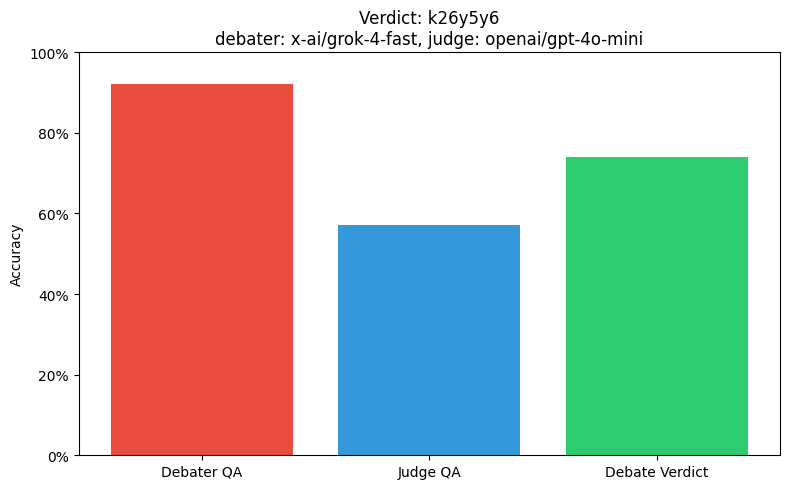

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(['Debater QA', 'Judge QA', 'Debate Verdict'], [debater_qa, judge_qa, debate_verdict], color=['#e74c3c', '#3498db', '#2ecc71'])                                                                                   
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
debater_model = merged_df['config_debate_debater_model'].iloc[0]
judge_model = merged_df['config_verdict_judge_model'].iloc[0]
plt.title(f'Verdict: {verdict_run_id}\ndebater: {debater_model}, judge: {judge_model}')
plt.tight_layout()
plt.show()

### Compare accuracies across verdicts

In [2]:
# verdict_ids = ['k26y5y6', 'kn8lecm', 'hmsolpd', 'okcg9s1']
# verdict_ids = ['yt32eoi', 'ouuwuug', 'qiqr2wo', '0va6ifr']
# results_df = results_by_run(verdict_ids)

# look at gqpa 4 choice and 2 choice (unique over runs)
verdicts_df = get_verdict_configs()

verdict_ids_gpqa_4_choice = verdicts_df[verdicts_df['debate_id'] == 'q6wpwb7']['verdict_id'].tolist()
unique_df_gpqa_4_choice, unique_configs_gpqa_4_choice = load_unique_over_runs(verdict_ids_gpqa_4_choice, 'load_debate_and_verdict_and_qa')
results_df_gpqa_4_choice = results_by_config(unique_df_gpqa_4_choice, unique_configs_gpqa_4_choice)

verdict_ids_gpqa_2_choice = verdicts_df[verdicts_df['debate_id'] == '17zguxe']['verdict_id'].tolist()
unique_df_gpqa_2_choice, unique_configs_gpqa_2_choice = load_unique_over_runs(verdict_ids_gpqa_2_choice, 'load_debate_and_verdict_and_qa')
results_df_gpqa_2_choice = results_by_config(unique_df_gpqa_2_choice, unique_configs_gpqa_2_choice)


loaded verdict: yt32eoi: starting records: 187, dropped 1 without judge QA, dropped 0 without debater QA, final records: 186
loaded verdict: ouuwuug: starting records: 185, dropped 0 without judge QA, dropped 0 without debater QA, final records: 185
loaded verdict: qiqr2wo: starting records: 187, dropped 2 without judge QA, dropped 0 without debater QA, final records: 185
loaded verdict: 0va6ifr: starting records: 160, dropped 5 without judge QA, dropped 0 without debater QA, final records: 155
loaded verdict: faqmo5o: starting records: 187, dropped 33 without judge QA, dropped 0 without debater QA, final records: 154
loaded verdict: 4rg7b4b: starting records: 188, dropped 22 without judge QA, dropped 0 without debater QA, final records: 166
loaded verdict: jm9kod3: starting records: 186, dropped 3 without judge QA, dropped 0 without debater QA, final records: 183
loaded verdict: 3oxc0v3: starting records: 49, dropped 14 without judge QA, dropped 0 without debater QA, final records: 35

In [47]:
# For safety, filter to idxs that are shared across 2/4 choice and across every config. That way, all the data is exactly consistent. It doesn't change the results.

# Find shared idxs across 2/4 choice
shared_pairs = unique_df_gpqa_2_choice[['config_verdict_judge_model', 'question_idx']].merge(unique_df_gpqa_4_choice[['config_verdict_judge_model', 'question_idx']])

unique_df_gpqa_2_choice_shared = unique_df_gpqa_2_choice.merge(shared_pairs)
unique_df_gpqa_4_choice_shared = unique_df_gpqa_4_choice.merge(shared_pairs)

results_df_gpqa_2_choice_shared = results_by_config(unique_df_gpqa_2_choice_shared, unique_configs_gpqa_2_choice)
results_df_gpqa_4_choice_shared = results_by_config(unique_df_gpqa_4_choice_shared, unique_configs_gpqa_4_choice)


# Find shared idxs across every config
temp_df = unique_df_gpqa_2_choice_shared.groupby('config_verdict_judge_model').filter(lambda x: len(x) >= 160)
unique_judge_models = temp_df['config_verdict_judge_model'].unique()
total_configs = len(unique_judge_models)
shared_question_idxs = (
    temp_df
    .groupby('question_idx')['config_verdict_judge_model']
    .nunique()
    .loc[lambda x: x == total_configs]
    .index.tolist()
)

unique_df_gpqa_2_choice_shared_AND_everyconfig = unique_df_gpqa_2_choice_shared[unique_df_gpqa_2_choice_shared['question_idx'].isin(shared_question_idxs) & (unique_df_gpqa_2_choice_shared['config_verdict_judge_model'].isin(unique_judge_models))]
unique_df_gpqa_4_choice_shared_AND_everyconfig = unique_df_gpqa_4_choice_shared[unique_df_gpqa_4_choice_shared['question_idx'].isin(shared_question_idxs) & (unique_df_gpqa_4_choice_shared['config_verdict_judge_model'].isin(unique_judge_models))]

unique_configs_gpqa_2_choice_shared_AND_everyconfig = [x for x in unique_configs_gpqa_2_choice if x['config_verdict_judge_model'] in unique_judge_models]
unique_configs_gpqa_4_choice_shared_AND_everyconfig = [x for x in unique_configs_gpqa_4_choice if x['config_verdict_judge_model'] in unique_judge_models]

results_df_gpqa_2_choice_shared_AND_everyconfig = results_by_config(unique_df_gpqa_2_choice_shared_AND_everyconfig, unique_configs_gpqa_2_choice_shared_AND_everyconfig)
results_df_gpqa_4_choice_shared_AND_everyconfig = results_by_config(unique_df_gpqa_4_choice_shared_AND_everyconfig, unique_configs_gpqa_4_choice_shared_AND_everyconfig)



/Users/joshlevy/projects/llm_judge_debate_NEW/utils/analysis_utils.py:287: RuntimeWarning: divide by zero encountered in scalar divide
  'pgr': (filtered_df['is_correct_verdict'].mean() - filtered_df['is_correct_judge_qa'].mean()) / (filtered_df['is_correct_debater_qa'].mean() - filtered_df['is_correct_judge_qa'].mean()),


debater_qa_acc: 0.94, judge_qa_acc: 0.59, verdict_acc: 0.62


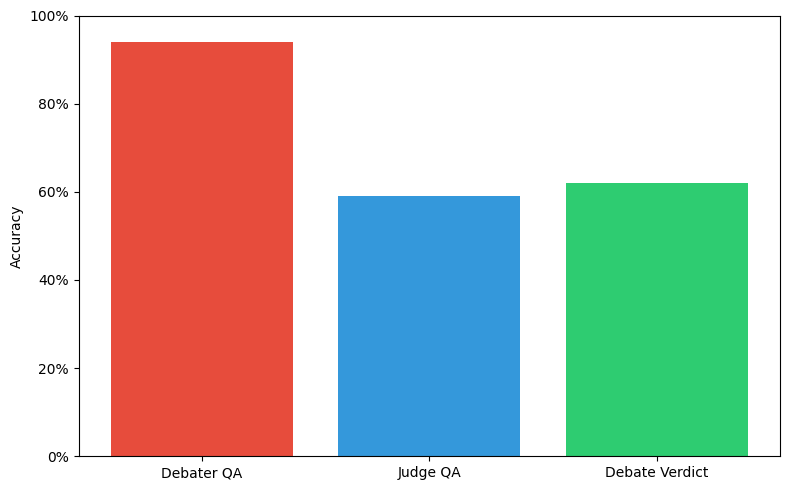

In [49]:
# results_df = results_df_gpqa_2_choice
# results_df = results_df_gpqa_4_choice

results_df = results_df_gpqa_2_choice_shared_AND_everyconfig
# results_df = results_df_gpqa_4_choice_shared_AND_everyconfig

total_records = results_df[f'n_total'].sum()
debater_qa = round(results_df[f'debater_qa_n_correct'].sum() /total_records, 2)
judge_qa = round(results_df[f'judge_qa_n_correct'].sum() /total_records, 2)
debate_verdict = round(results_df[f'verdict_n_correct'].sum() /total_records, 2)

print(f'debater_qa_acc: {debater_qa}, judge_qa_acc: {judge_qa}, verdict_acc: {debate_verdict}')

# Bar 
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(['Debater QA', 'Judge QA', 'Debate Verdict'], [debater_qa, judge_qa, debate_verdict], color=['#e74c3c', '#3498db', '#2ecc71'])                                                                                   
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.tight_layout()
plt.show()

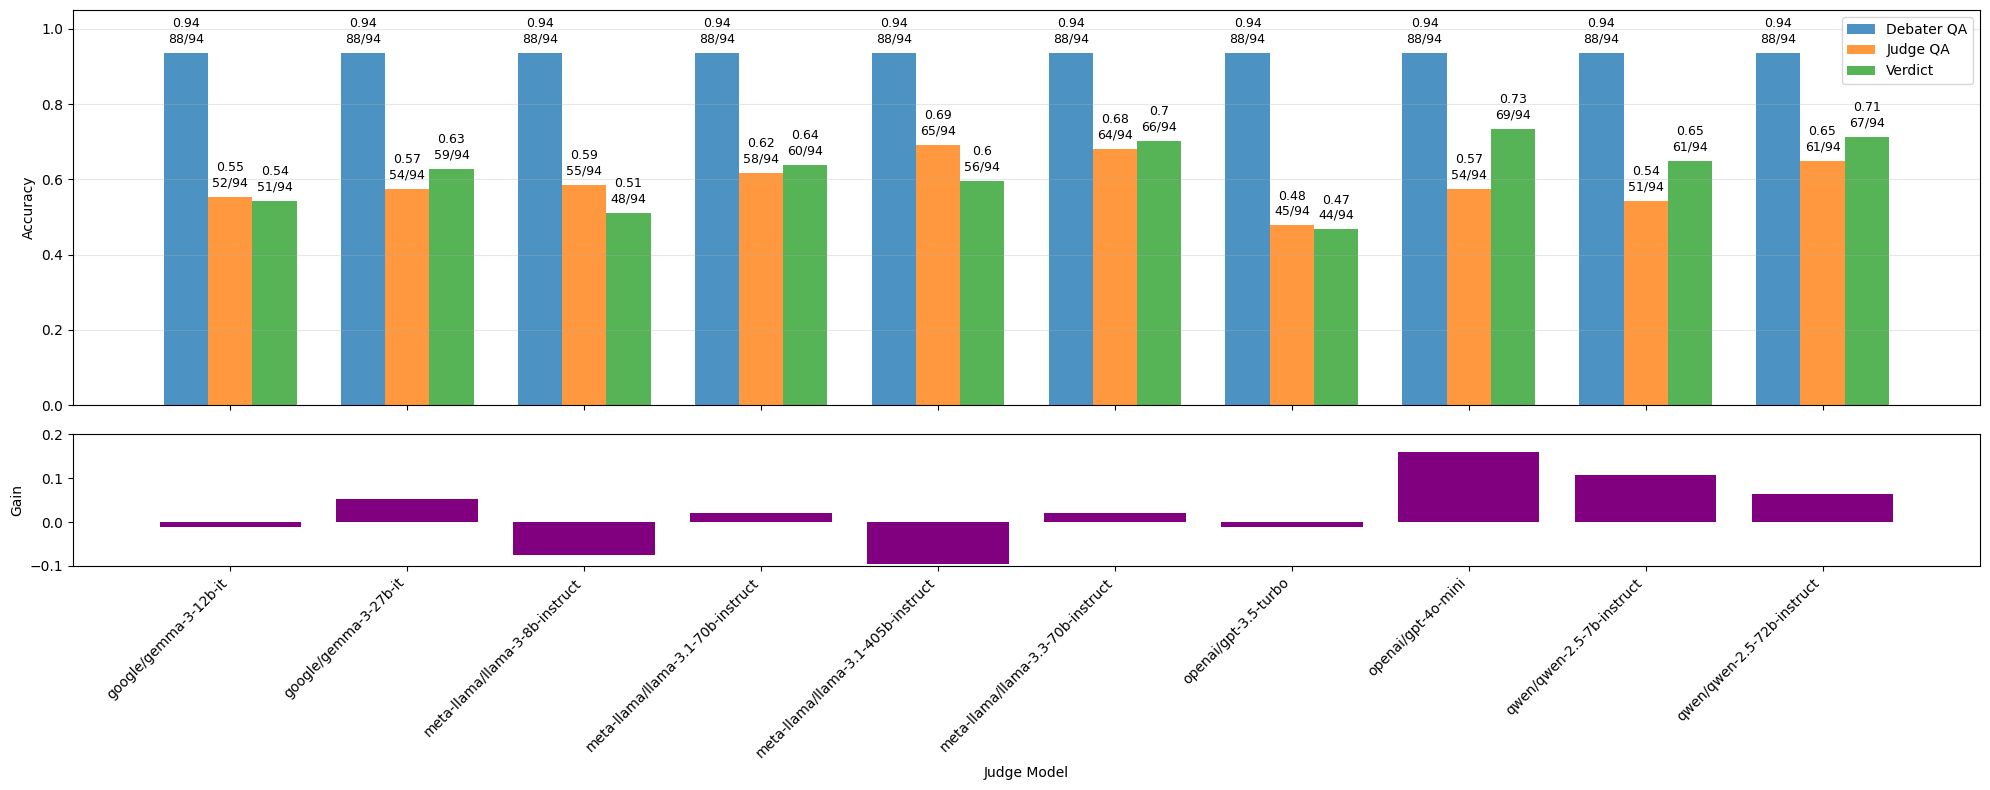

In [ ]:
# results_df = results_df_gpqa_2_choice
# results_df = results_df_gpqa_4_choice

# results_df = results_df_gpqa_2_choice_shared
# results_df = results_df_gpqa_4_choice_shared

# results_df = results_df_gpqa_2_choice_shared_AND_everyconfig
results_df = results_df_gpqa_4_choice_shared_AND_everyconfig

plot_results_by_name(results_df)

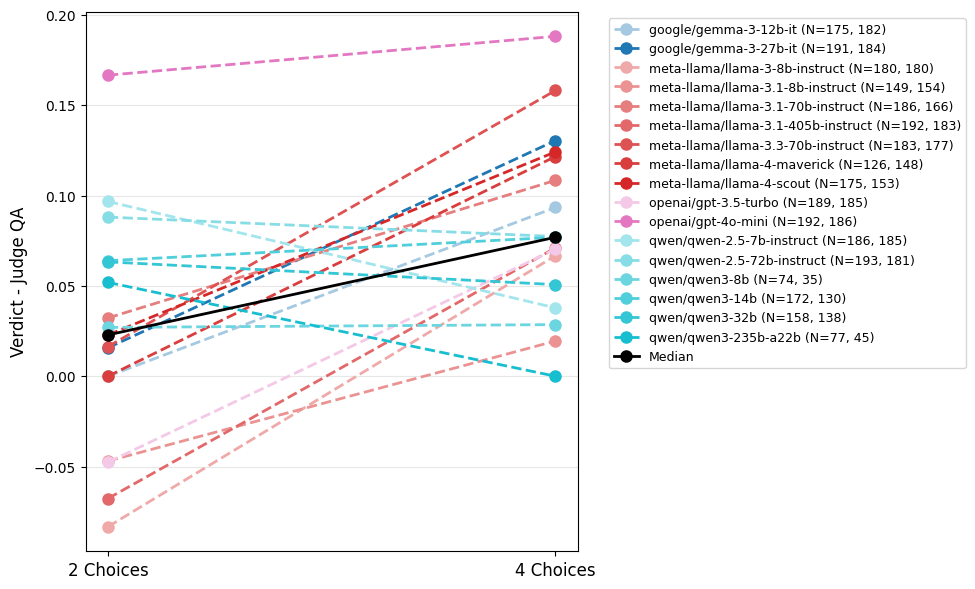

In [56]:
merged = results_df_gpqa_2_choice.merge(
    results_df_gpqa_4_choice, 
    on='name', 
    suffixes=('_2choice', '_4choice')
)

# merged = results_df_gpqa_2_choice_shared_AND_everyconfig.merge(
#     results_df_gpqa_4_choice_shared_AND_everyconfig,
#     on='name',
#     suffixes=('_2choice', '_4choice')
# )

sorted_names, color_map = sort_and_color_by_model_family(merged['name'].unique())
merged['sort_order'] = merged['name'].map({name: i for i, name in enumerate(sorted_names)})
merged = merged.sort_values('sort_order').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))

for _, row in merged.iterrows():
    n_2choice = int(row['n_total_2choice'])
    n_4choice = int(row['n_total_4choice'])
    ax.plot([0, 1], [row['verdict_minus_judge_qa_2choice'], row['verdict_minus_judge_qa_4choice']], 
            marker='o', label=f"{row['name']} (N={n_2choice}, {n_4choice})", color=color_map[row['name']], linewidth=2, markersize=8, linestyle='--')

ax.plot([0, 1], [merged['verdict_minus_judge_qa_2choice'].median(), merged['verdict_minus_judge_qa_4choice'].median()], 
        marker='o', label='Median', color='black', linewidth=2, markersize=8, linestyle='-')

ax.set_xticks([0, 1])
ax.set_xticklabels(['2 Choices', '4 Choices'], fontsize=12)
ax.set_ylabel('Verdict - Judge QA', fontsize=12)
ax.grid(axis='y', alpha=0.3)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

/Users/joshlevy/projects/llm_judge_debate_NEW/utils/analysis_utils.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df[f'debater_minus_judge'] = results_df[f'debater_qa_acc'] - results_df[f'judge_qa_acc']
/Users/joshlevy/projects/llm_judge_debate_NEW/utils/analysis_utils.py:328: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['sort_order'] = results_df['name'].map({name: i for i, name in enumerate(names)})


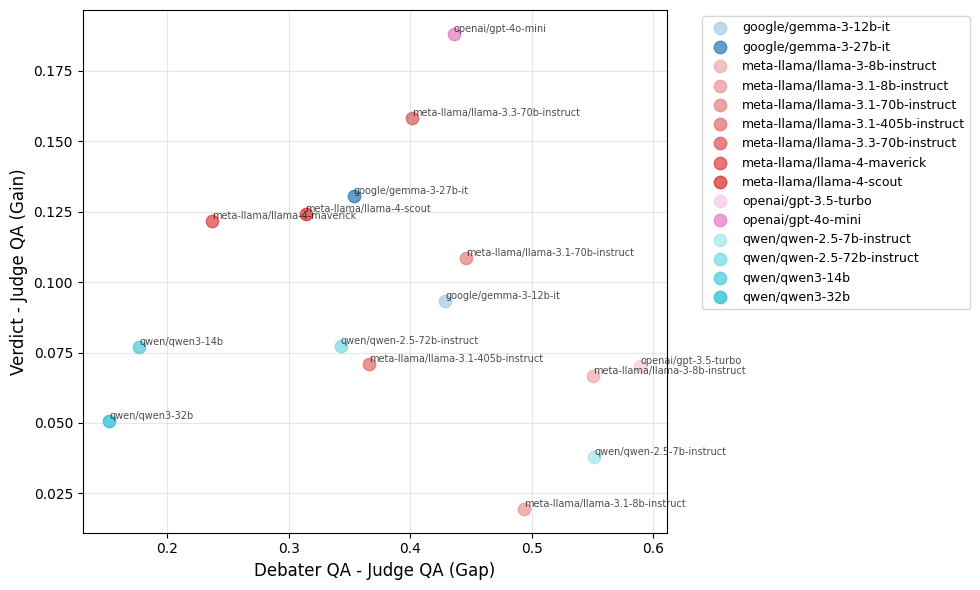

In [59]:
results_df = results_df_gpqa_4_choice
# results_df = results_df_gpqa_2_choice

# results_df = results_df_gpqa_4_choice_shared_AND_everyconfig
# results_df = results_df_gpqa_2_choice_shared_AND_everyconfig

results_df = results_df[results_df['n_total'] > 45]
plot_gain_scatter(results_df, n_choices=4, over='gap') # or over=judge_qa
# plot_gain_scatter(results_df, n_choices=4, over='judge_qa')

### Look at GPQA domain breakdown

In [60]:
dataset = load_dataset('Idavidrein/gpqa', 'gpqa_diamond')['train']
dataset_df = dataset.to_pandas()
dataset_df = dataset_df.rename({'Question': 'question', 'High-level domain': 'high_level_domain'}, axis=1)

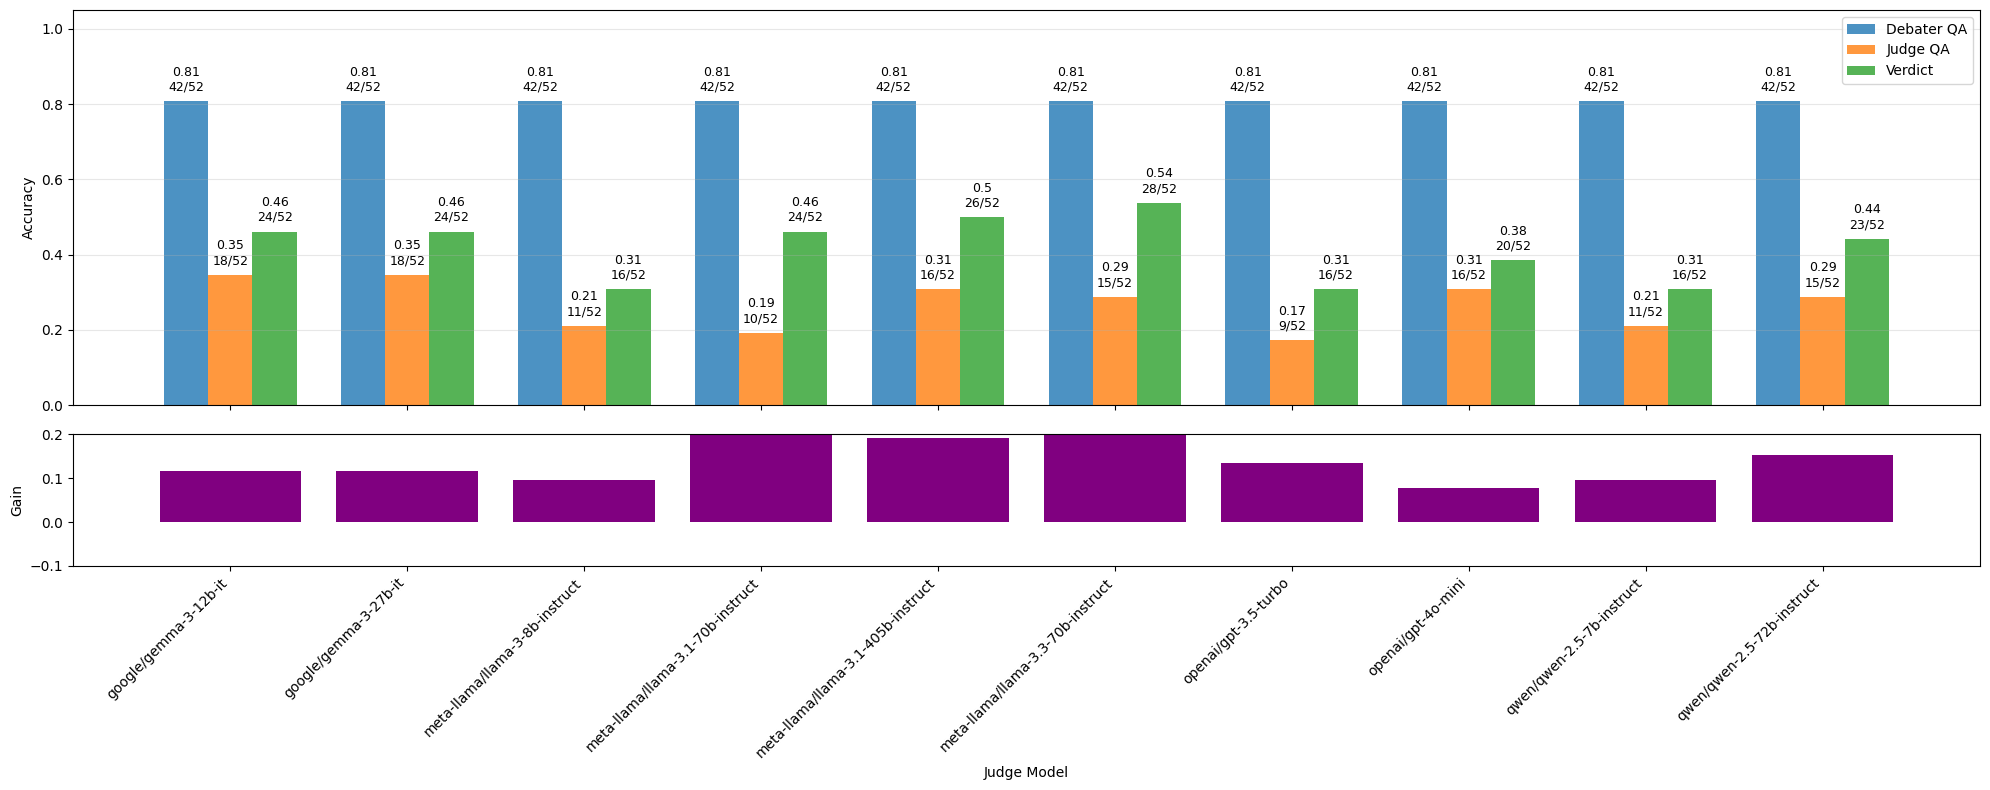

In [63]:
# There's a column called high-level domain in gpqa dataset
# Let's get the data and merged with the results_df

domain = 'Chemistry'
# domain = 'Physics'

# unique_df = unique_df_gpqa_2_choice
# unique_configs = unique_configs_gpqa_2_choice

# unique_df = unique_df_gpqa_4_choice
# unique_configs = unique_configs_gpqa_4_choice

# unique_df = unique_df_gpqa_2_choice_shared_AND_everyconfig
# unique_configs = unique_configs_gpqa_2_choice_shared_AND_everyconfig

unique_df = unique_df_gpqa_4_choice_shared_AND_everyconfig
unique_configs = unique_configs_gpqa_4_choice_shared_AND_everyconfig

unique_df = unique_df.merge(dataset_df[['question', 'high_level_domain']], on='question', how='left')
unique_df = unique_df[unique_df['high_level_domain'] == domain]
results_df = results_by_config(unique_df, unique_configs)

plot_results_by_name(results_df)

/Users/joshlevy/projects/llm_judge_debate_NEW/utils/analysis_utils.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['name'], rotation=45, ha='right')
/Users/joshlevy/projects/llm_judge_debate_NEW/utils/analysis_utils.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['name'], rotation=45, ha='right')


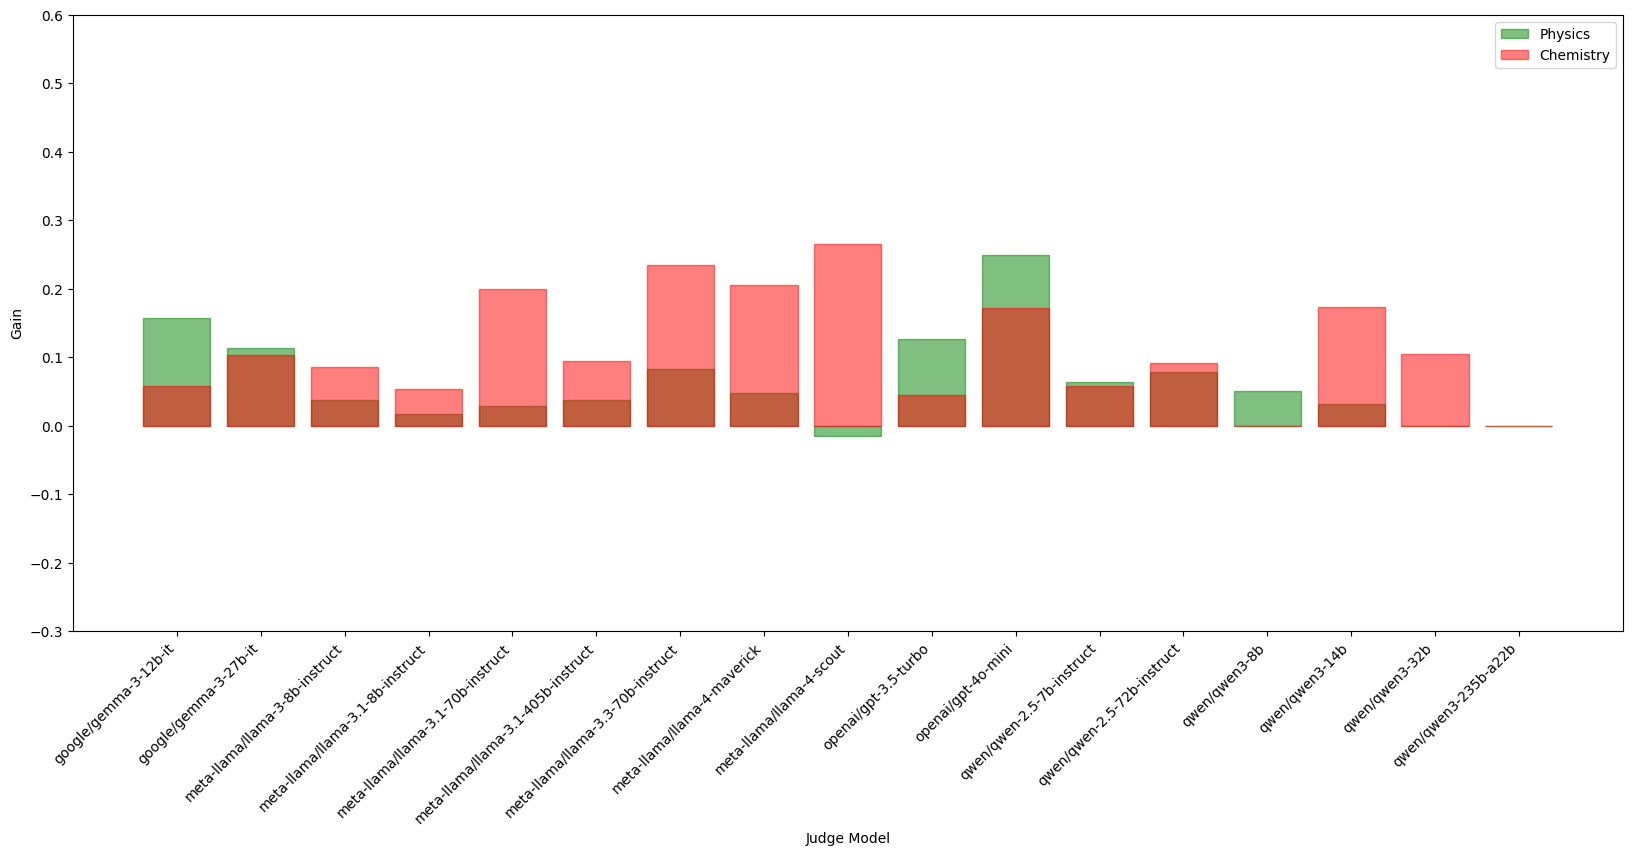

In [78]:
# Compare the physics to chemistry in a bar plot - overlapping with alpha

type = 'gain' # or 'gain

unique_df = unique_df_gpqa_4_choice
unique_configs = unique_configs_gpqa_4_choice

# unique_df = unique_df_gpqa_2_choice
# unique_configs = unique_configs_gpqa_2_choice

# unique_df = unique_df_gpqa_4_choice_shared_AND_everyconfig
# unique_configs = unique_configs_gpqa_4_choice_shared_AND_everyconfig

# unique_df = unique_df_gpqa_2_choice_shared_AND_everyconfig
# unique_configs = unique_configs_gpqa_2_choice_shared_AND_everyconfig


unique_df = unique_df.merge(dataset_df[['question', 'high_level_domain']], on='question', how='left')
unique_df_chemistry = unique_df[unique_df['high_level_domain'] == 'Chemistry']
unique_df_physics = unique_df[unique_df['high_level_domain'] == 'Physics']


results_df_chemistry = results_by_config(unique_df_chemistry, unique_configs)
results_df_physics = results_by_config(unique_df_physics, unique_configs)

fig, ax = plt.subplots(figsize=(20, 8))
bars1 = plot_verdict_difference(results_df_physics, ax=ax, type=type)
bars2 = plot_verdict_difference(results_df_chemistry, ax=ax, type=type)

ax.set_ylim(-.3, .6)

for bar in bars1:
    bar.set_alpha(0.5)
    bar.set_color('green')

for bar in bars2:
    bar.set_alpha(0.5)
    bar.set_color('red')

plt.legend(['Physics', 'Chemistry'])
plt.show()


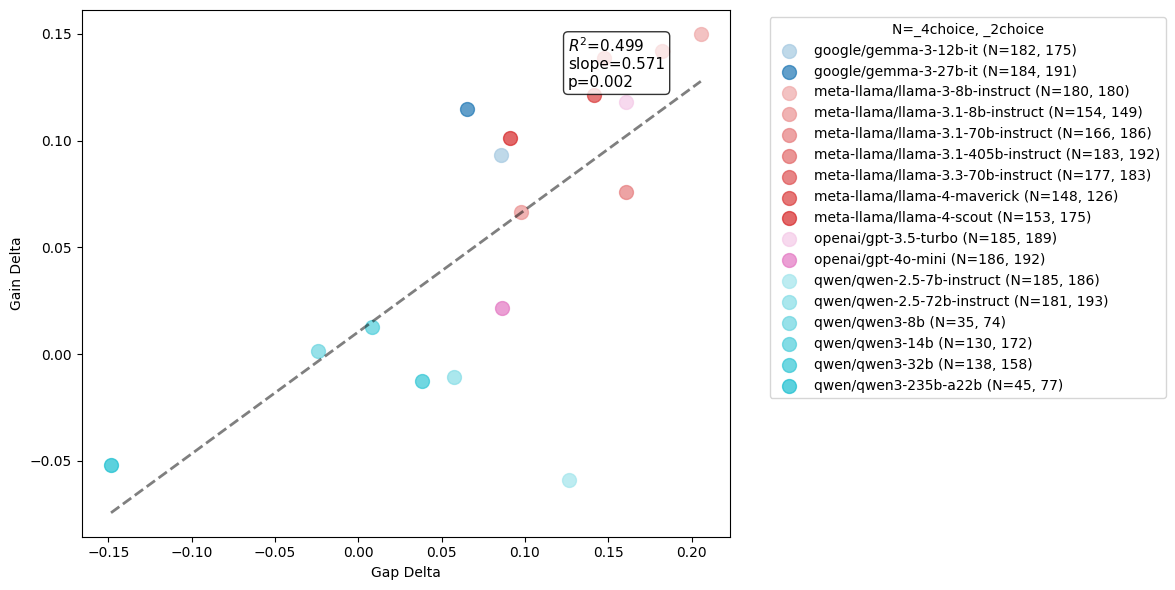

In [82]:
## Look at gap DELTAS relative to gain DELTAS

# suffixes = ['_chemistry', '_physics']
# merged = results_df_chemistry.merge(results_df_physics, on='name', suffixes=suffixes)

suffixes = ['_4choice', '_2choice']
merged = results_df_gpqa_4_choice.merge(results_df_gpqa_2_choice, on='name', suffixes=suffixes)

plot_delta_over_delta(merged, suffixes, xfield='gap_delta', yfield='gain_delta', n_min=20)

### Breakdown the results by category for MMLU-Pro

In [558]:
# From TIGER-Lab/MMLU-Pro, there's a column called "category"
# Add this column to the merged_df

# verdict_run_id = 'ntxteqy'
# verdict_run_id = '07e1puy'
# verdict_run_id = '9amuk8w'
verdict_run_id = '4nay3cp'

merged_df = load_debate_and_verdict_and_qa(verdict_run_id)
mmlu_dataset = load_dataset('TIGER-Lab/MMLU-Pro')['test']

category_map = {}
for idx in range(len(mmlu_dataset)):
    category_map[idx] = mmlu_dataset[idx].get('category', None)
merged_df['category'] = merged_df['question_idx'].map(category_map)

print(merged_df['category'].value_counts())



loaded verdict: 4nay3cp: starting records: 1280, dropped 73 without judge QA, dropped 15 without debater QA, final records: 1192
category
other               124
law                 121
economics           116
physics             108
health              102
math                 98
psychology           96
chemistry            92
philosophy           70
biology              66
engineering          61
business             54
history              42
computer science     42
Name: count, dtype: int64


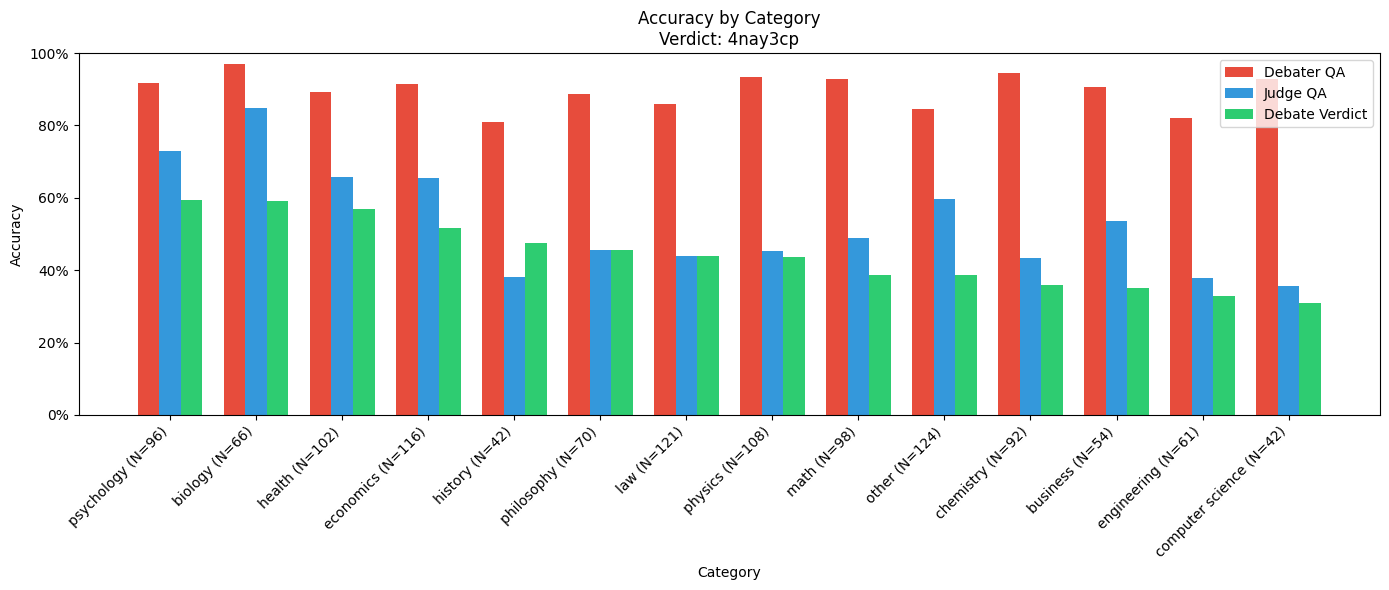


Category Results:
        category is_correct_debater_qa is_correct_judge_qa  is_correct_verdict  count
      psychology              0.916667            0.729167            0.593750     96
         biology              0.969697            0.848485            0.590909     66
          health              0.892157            0.656863            0.568627    102
       economics              0.913793            0.655172            0.517241    116
         history              0.809524            0.380952            0.476190     42
      philosophy              0.885714            0.457143            0.457143     70
             law              0.859504            0.438017            0.438017    121
         physics              0.935185            0.453704            0.435185    108
            math              0.928571            0.489796            0.387755     98
           other              0.846774            0.596774            0.387097    124
       chemistry              0.945

In [559]:
category_results = merged_df.groupby('category').agg({
    'is_correct_debater_qa': 'mean',
    'is_correct_judge_qa': 'mean',
    'is_correct_verdict': ['mean', 'count']
}).reset_index()

category_results.columns = ['category', 'is_correct_debater_qa', 'is_correct_judge_qa', 'is_correct_verdict', 'count']
category_results = category_results.sort_values('is_correct_verdict', ascending=False)

fig, ax = plt.subplots(figsize=(14, 6))

categories = category_results['category']
counts = category_results['count']
x = np.arange(len(categories))
width = 0.25

bars1 = ax.bar(x - width, category_results['is_correct_debater_qa'], width, label='Debater QA', color='#e74c3c')                                                                                                        
bars2 = ax.bar(x, category_results['is_correct_judge_qa'], width, label='Judge QA', color='#3498db')
bars3 = ax.bar(x + width, category_results['is_correct_verdict'], width, label='Debate Verdict', color='#2ecc71')                                                                                                       

ax.set_xlabel('Category')
ax.set_ylabel('Accuracy')
ax.set_title(f'Accuracy by Category\nVerdict: {verdict_run_id}')
ax.set_xticks(x)
category_labels = [f'{cat} (N={cnt})' for cat, cnt in zip(categories, counts)]
ax.set_xticklabels(category_labels, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.tight_layout()
plt.show()

print(f"\nCategory Results:")
print(category_results.to_string(index=False))

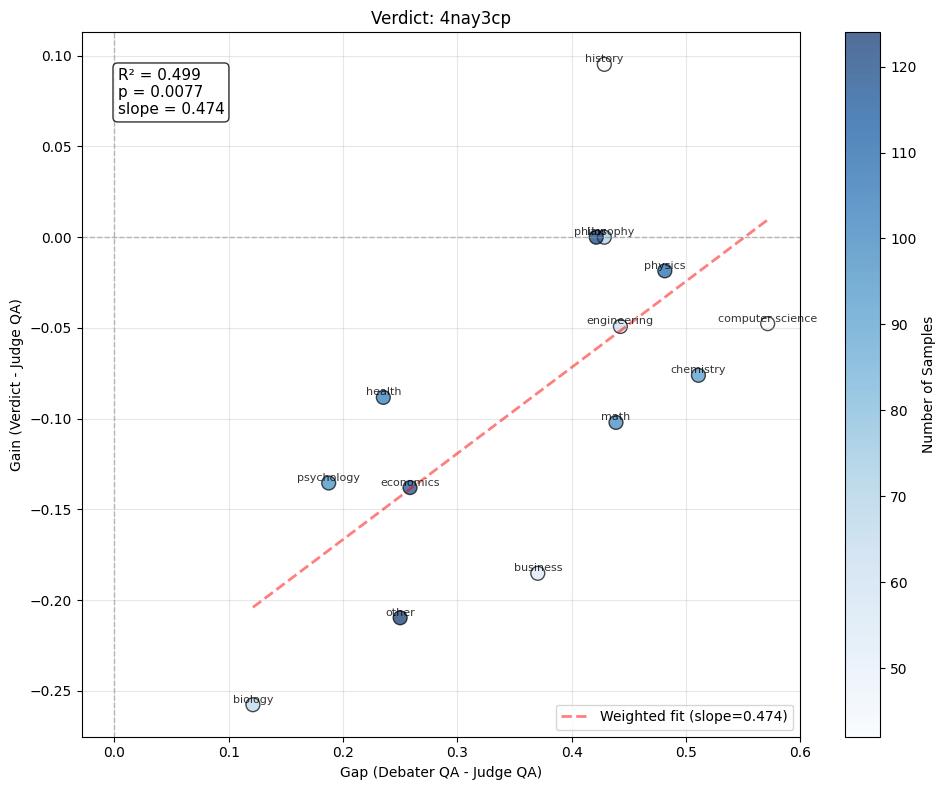


Scatter Plot Data:
        category    delta      gain  count
      psychology 0.187500 -0.135417     96
         biology 0.121212 -0.257576     66
          health 0.235294 -0.088235    102
       economics 0.258621 -0.137931    116
         history 0.428571  0.095238     42
      philosophy 0.428571  0.000000     70
             law 0.421488  0.000000    121
         physics 0.481481 -0.018519    108
            math 0.438776 -0.102041     98
           other 0.250000 -0.209677    124
       chemistry 0.510870 -0.076087     92
        business 0.370370 -0.185185     54
     engineering 0.442623 -0.049180     61
computer science 0.571429 -0.047619     42


In [566]:
category_results['judge_acc'] = category_results['is_correct_judge_qa'].astype(float)
category_results['gap'] = category_results['is_correct_debater_qa'].astype(float) - category_results['is_correct_judge_qa'].astype(float)
category_results['gain'] = category_results['is_correct_verdict'].astype(float) - category_results['is_correct_judge_qa'].astype(float)

from scipy import stats
from sklearn.linear_model import LinearRegression

xfield = 'gap'
# xfield = 'judge_acc'
yfield = 'gain'

x = category_results[xfield].values.astype(float)
y = category_results[yfield].values.astype(float)
weights = category_results['count'].values.astype(float)

model = LinearRegression()
model.fit(x.reshape(-1, 1), y, sample_weight=weights)
slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(x.reshape(-1, 1))
ss_res = np.sum(weights * (y - y_pred)**2)
ss_tot = np.sum(weights * (y - np.average(y, weights=weights))**2)
r_squared = 1 - (ss_res / ss_tot)

pearson_r, p_value = stats.pearsonr(x, y)

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(category_results[xfield], category_results[yfield], 
                     c=category_results['count'], s=100, cmap='Blues', alpha=0.7, edgecolors='black')

x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, 'r--', linewidth=2, alpha=0.5, label=f'Weighted fit (slope={slope:.3f})')

for i, row in category_results.iterrows():
    ax.annotate(row['category'], (row[xfield], row[yfield]), 
                fontsize=8, ha='center', va='bottom', alpha=0.8)

ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

stats_text = f'R² = {r_squared:.3f}\np = {p_value:.4f}\nslope = {slope:.3f}'
ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

fieldname_to_label_map = {
    'gap': 'Gap (Debater QA - Judge QA)',
    'gain': 'Gain (Verdict - Judge QA)',
    'judge_acc': 'Judge QA'
}


ax.set_xlabel(fieldname_to_label_map[xfield])
ax.set_ylabel(fieldname_to_label_map[yfield])
ax.set_title(f'Verdict: {verdict_run_id}')
ax.grid(True, alpha=0.3)
ax.legend()

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Number of Samples')

plt.tight_layout()
plt.show()

print("\nScatter Plot Data:")
print(category_results[['category', 'delta', 'gain', 'count']].to_string(index=False))


### Analysis across verdict runs

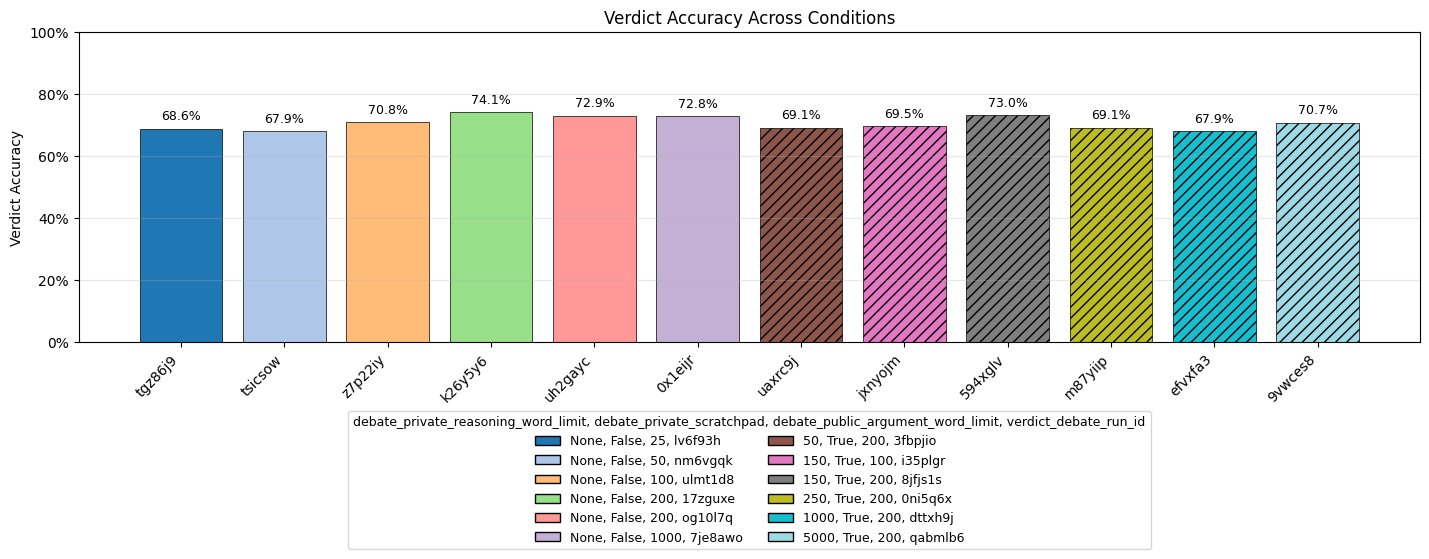

Differing parameters: ['debate_private_reasoning_word_limit', 'debate_private_scratchpad', 'debate_public_argument_word_limit', 'verdict_debate_run_id']

Accuracies:
  tgz86j9: 68.65%
  tsicsow: 67.86%
  z7p22iy: 70.83%
  k26y5y6: 74.09%
  uh2gayc: 72.92%
  0x1eijr: 72.83%
  uaxrc9j: 69.07%
  jxnyojm: 69.54%
  594xglv: 73.02%
  m87yiip: 69.07%
  efvxfa3: 67.88%
  9vwces8: 70.68%


In [20]:
def get_combined_config(verdict_run_id):
    df = load_debate_and_verdict(verdict_run_id)
    return {col.replace('config_', ''): df.iloc[0][col] for col in df.columns if col.startswith('config_')}

verdicts_run_ids = ['uh2gayc', 'z7p22iy', 'jxnyojm', '594xglv', 'm87yiip', '0x1eijr', 'k26y5y6', 'efvxfa3', '9vwces8', 'uaxrc9j', 'tgz86j9', 'tsicsow']

all_configs = {}
for verdict_run_id in verdicts_run_ids:
    config = get_combined_config(verdict_run_id)
    if config:
        all_configs[verdict_run_id] = config

metadata_keys = {'run_id', 'record_id', 'datetime', 'debate_run_id', 'verdict_run_id'}
all_param_keys = set()
for config in all_configs.values():
    all_param_keys.update(k for k in config.keys() if k not in metadata_keys)

differing_params = []
for param_key in sorted(all_param_keys):
    values = [all_configs.get(vid, {}).get(param_key) for vid in verdicts_run_ids if vid in all_configs]
    unique_values = set(v for v in values if v is not None)
    if len(unique_values) > 1:
        differing_params.append(param_key)

accuracies = []
value_lists = []
run_ids_included = []

for verdict_run_id in verdicts_run_ids:
    if verdict_run_id not in all_configs:
        continue
    
    df = load_verdict(verdict_run_id)
    accuracy = df['is_correct_verdict'].mean()
    accuracies.append(accuracy)
    run_ids_included.append(verdict_run_id)
    
    config = all_configs[verdict_run_id]
    values = []
    for param in differing_params:
        value = config.get(param)
        if value is not None:
            values.append(str(value))
        else:
            values.append("None")
    value_lists.append(", ".join(values))

# Sort by parameter values
def smart_sort_key(item):
    _, _, value_str = item
    parts = value_str.split(", ")
    result = []
    for part in parts:
        if part == "None":
            result.append((0, None))
        elif part == "False":
            result.append((1, False))
        elif part == "True":
            result.append((2, True))
        else:
            try:
                result.append((3, int(part)))
            except ValueError:
                result.append((4, part))
    return result

sorted_data = sorted(zip(accuracies, run_ids_included, value_lists), key=smart_sort_key)
accuracies, run_ids_included, value_lists = zip(*sorted_data)

colors = plt.cm.tab20(np.linspace(0, 1, len(accuracies)))

fig, ax = plt.subplots(figsize=(max(10, len(accuracies) * 1.2), 6))

# Create bars with hatching for scratchpad runs
bars = []
for idx in range(len(accuracies)):
    config = all_configs[run_ids_included[idx]]
    has_scratchpad = config.get("debate_private_scratchpad", False)
    hatch = "///" if has_scratchpad else None
    bar = ax.bar(idx, accuracies[idx], color=colors[idx], hatch=hatch, edgecolor="black", linewidth=0.5)
    bars.append(bar)
ax.set_xticks(range(len(accuracies)))
ax.set_xticklabels(run_ids_included, rotation=45, ha='right')
ax.set_ylabel('Verdict Accuracy')
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title('Verdict Accuracy Across Conditions')
ax.grid(True, alpha=0.3, axis='y')

for i, acc in enumerate(accuracies):
    ax.text(i, acc + 0.02, f'{acc:.1%}', ha='center', va='bottom', fontsize=9)

param_header = ", ".join(differing_params)
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='black', label=value_lists[i]) 
                   for i in range(len(value_lists))]
legend = ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), 
                   ncol=2, fontsize=9, title=param_header, title_fontsize=9, frameon=True)
plt.tight_layout()
plt.show()

print(f"Differing parameters: {differing_params}")
print(f"\nAccuracies:")
for vid, acc in zip(run_ids_included, accuracies):
    print(f"  {vid}: {acc:.2%}")


### Analyze token usage in the debate run

In [12]:
run_id = 'dttxh9j'

debate_df = load_debate(run_id)

record_ids = []
completion_tokens_used_per_debate = []
reasoning_tokens_used_per_debate = []
for i, row in debate_df.iterrows():
    if row['success'] == False:
        continue
    record_ids.append(row['record_id'])
    debate_history = row['debate_history']
    completion_tokens_used_this_debate, reasoning_tokens_used_this_debate = 0, 0
    for turn in debate_history:
        completion_tokens_used_this_debate += turn['token_usage']['completion_tokens']
        if 'completion_tokens_details' in turn['token_usage'] and turn['token_usage']['completion_tokens_details'] is not None:
            reasoning_tokens_used_this_debate += turn['token_usage']['completion_tokens_details']['reasoning_tokens']
        else:
            reasoning_tokens_used_this_debate += 0
    completion_tokens_used_per_debate.append(completion_tokens_used_this_debate)
    reasoning_tokens_used_per_debate.append(reasoning_tokens_used_this_debate)

print(record_ids)
print(f"completion_tokens_used_per_debate: {completion_tokens_used_per_debate}")
print(f"reasoning_tokens_used_per_debate: {reasoning_tokens_used_per_debate}")


['kzrous5', 'hk8ubqd', '1qcavop', 'b4wassv', 'x3lzxbz', 'jh5jbyi', 'l1s826e', 'vxw819y', 'ft9z8yh', 'qstcwfj', 'j62qcbg', 'phcxgez', 'va1sr4j', '5d9hjkx', 'p4yqd71', 'r63u681', '655fxkg', 'stu7xez', '2dfhjyj', 'kyrmnkc', 'c7sckgd', 'iudop67', 'ecgh0pm', '8j7dz44', 'b1rimbx', 'cr0cdmf', 'a9bsn0e', 'c106unw', '3o3oiz2', 'x6gy4lo', 'pd11e05', 'cjzpl8j', '9pix5ix', '65943js', 'qn8ii0f', 'nqfni3t', 'zbcgy6y', 'y5658ma', 'xdybjn8', '6qwbjic', '7ap29ri', 'netnuxw', 'k8oab27', 'tkq4jwm', 'cb69ar8', 'xijlfq4', 'ynxmamb', 'f5dz059', 'mxtsuep', '3rl3ehv', '0i9k3x0', 'img9dz9', 'n159vel', 'ol30dgs', 'vt4ufjj', 'vy0uxu4', 'axegwzl', 'lp5odyr', 'rcucqoa', '2dmo93w', 'ran59bn', 'v4eww3t', 'cuhgta4', 'usa1ce0', 'w9a4xcq', 'srmo6fm', 's6b9i6d', 'c2j4go8', 'z34r23h', 'qifw16n', 'hm1rbnf', '0156a9s', 'k3414go', 'oofglb7', '9z1omif', 'ure0jqh', 'ot76ght', 'iilcjvg', '65effsm', 'qr8rx44', '59ctvmi', 'axqjuyg', '3qp6fws', 'bfqhed6', 'ywfgkuk', 'xxthyfy', 'fumf7yx', '4stbyiy', '5gc75gp', '32tfp35', '6otyiog'